In [2]:
# Install necessary libraries 
!pip install pandas numpy scikit-learn matplotlib seaborn


In [3]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [4]:
# Load UCI Heart Disease dataset
df = pd.read_csv("/kaggle/input/heart-disease-dataset-uci/HeartDiseaseTrain-Test.csv")
df.head()


,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,Male,Typical angina,125,212,Lower than 120 mg/ml,ST-T wave abnormality,168,No,1.0,Downsloping,Two,Reversable Defect,0
1,53,Male,Typical angina,140,203,Greater than 120 mg/ml,Normal,155,Yes,3.1,Upsloping,Zero,Reversable Defect,0
2,70,Male,Typical angina,145,174,Lower than 120 mg/ml,ST-T wave abnormality,125,Yes,2.6,Upsloping,Zero,Reversable Defect,0
3,61,Male,Typical angina,148,203,Lower than 120 mg/ml,ST-T wave abnormality,161,No,0.0,Downsloping,One,Reversable Defect,0
4,62,Female,Typical angina,138,294,Greater than 120 mg/ml,ST-T wave abnormality,106,No,1.9,Flat,Three,Fixed Defect,0


In [5]:
#Dataset Overview
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
df.info()


Shape: (1025, 14)
Columns: ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholestoral', 'fasting_blood_sugar', 'rest_ecg', 'Max_heart_rate', 'exercise_induced_angina', 'oldpeak', 'slope', 'vessels_colored_by_flourosopy', 'thalassemia', 'target']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            1025 non-null   int64  
 1   sex                            1025 non-null   object 
 2   chest_pain_type                1025 non-null   object 
 3   resting_blood_pressure         1025 non-null   int64  
 4   cholestoral                    1025 non-null   int64  
 5   fasting_blood_sugar            1025 non-null   object 
 6   rest_ecg                       1025 non-null   object 
 7   Max_heart_rate                 1025 non-null   int64  
 8   exercise_induced_angina     

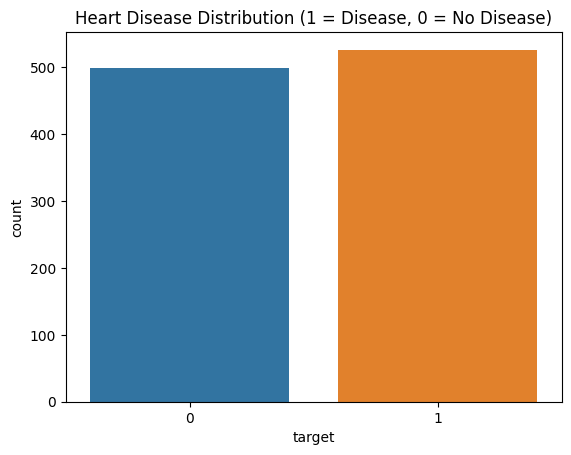

In [6]:
#Target Distribution
sns.countplot(data=df, x='target')
plt.title("Heart Disease Distribution (1 = Disease, 0 = No Disease)")
plt.show()


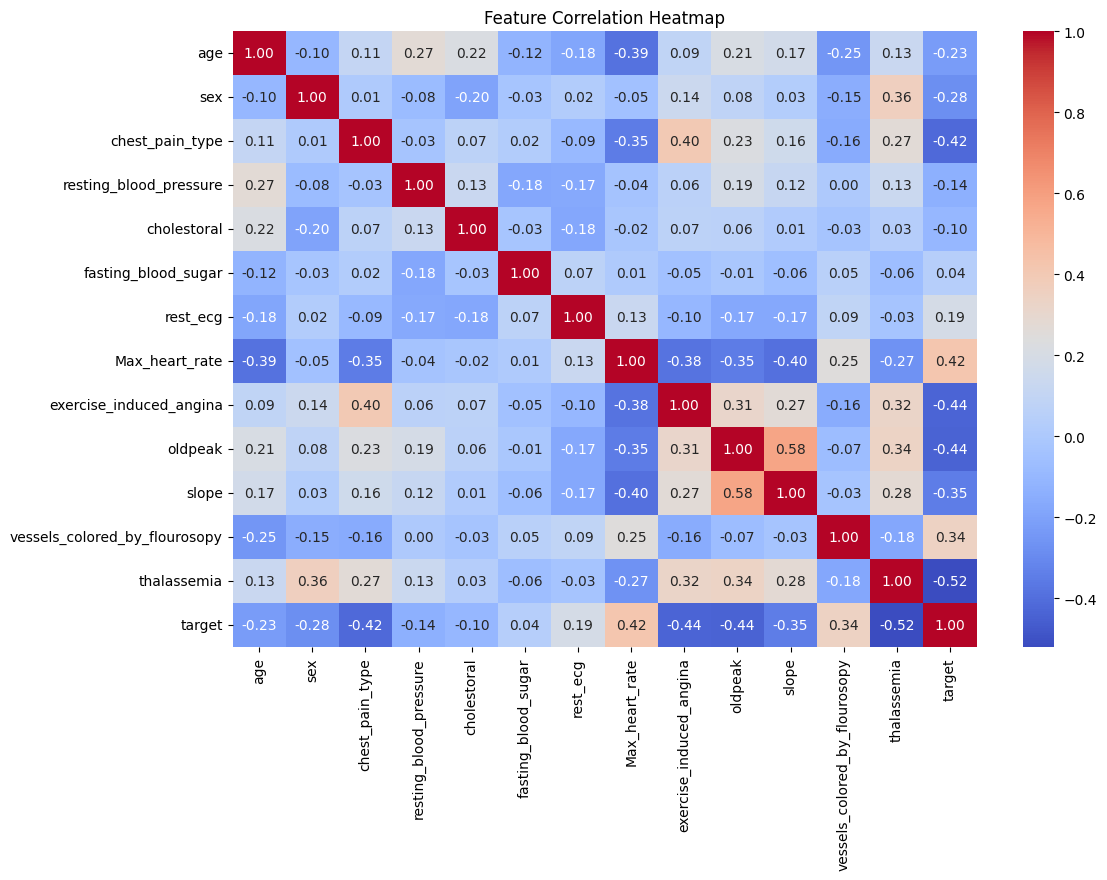

In [7]:
# Convert categorical columns to numeric using label encoding
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()
le = LabelEncoder()

for col in df_encoded.columns:
    if df_encoded[col].dtype == 'object':
        df_encoded[col] = le.fit_transform(df_encoded[col])

# Now plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


In [8]:
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            1025 non-null   int64  
 1   sex                            1025 non-null   object 
 2   chest_pain_type                1025 non-null   object 
 3   resting_blood_pressure         1025 non-null   int64  
 4   cholestoral                    1025 non-null   int64  
 5   fasting_blood_sugar            1025 non-null   object 
 6   rest_ecg                       1025 non-null   object 
 7   Max_heart_rate                 1025 non-null   int64  
 8   exercise_induced_angina        1025 non-null   object 
 9   oldpeak                        1025 non-null   float64
 10  slope                          1025 non-null   object 
 11  vessels_colored_by_flourosopy  1025 non-null   object 
 12  thalassemia                    1025 non-null   o

In [10]:
#Train-Test Split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Copy original dataframe
df_encoded = df.copy()

# Encode all categorical columns using LabelEncoder
le = LabelEncoder()
for col in df_encoded.columns:
    if df_encoded[col].dtype == 'object':
        df_encoded[col] = le.fit_transform(df_encoded[col])

# Split features and target
X = df_encoded.drop('target', axis=1)
y = df_encoded['target']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Confirm the split
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)



Train shape: (820, 13)
Test shape: (205, 13)


In [11]:
#Scale Features (for KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [12]:
#Train KNN Classifier
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
knn_pred = knn.predict(X_test_scaled)

print("KNN Accuracy:", accuracy_score(y_test, knn_pred))
print(classification_report(y_test, knn_pred))


KNN Accuracy: 0.8634146341463415
              precision    recall  f1-score   support

           0       0.87      0.85      0.86       100
           1       0.86      0.88      0.87       105

    accuracy                           0.86       205
   macro avg       0.86      0.86      0.86       205
weighted avg       0.86      0.86      0.86       205



In [13]:
#Train Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, dt_pred))
print(classification_report(y_test, dt_pred))


Decision Tree Accuracy: 0.9853658536585366
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       100
           1       1.00      0.97      0.99       105

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



In [14]:
# Train Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print(classification_report(y_test, rf_pred))


Random Forest Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       105

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



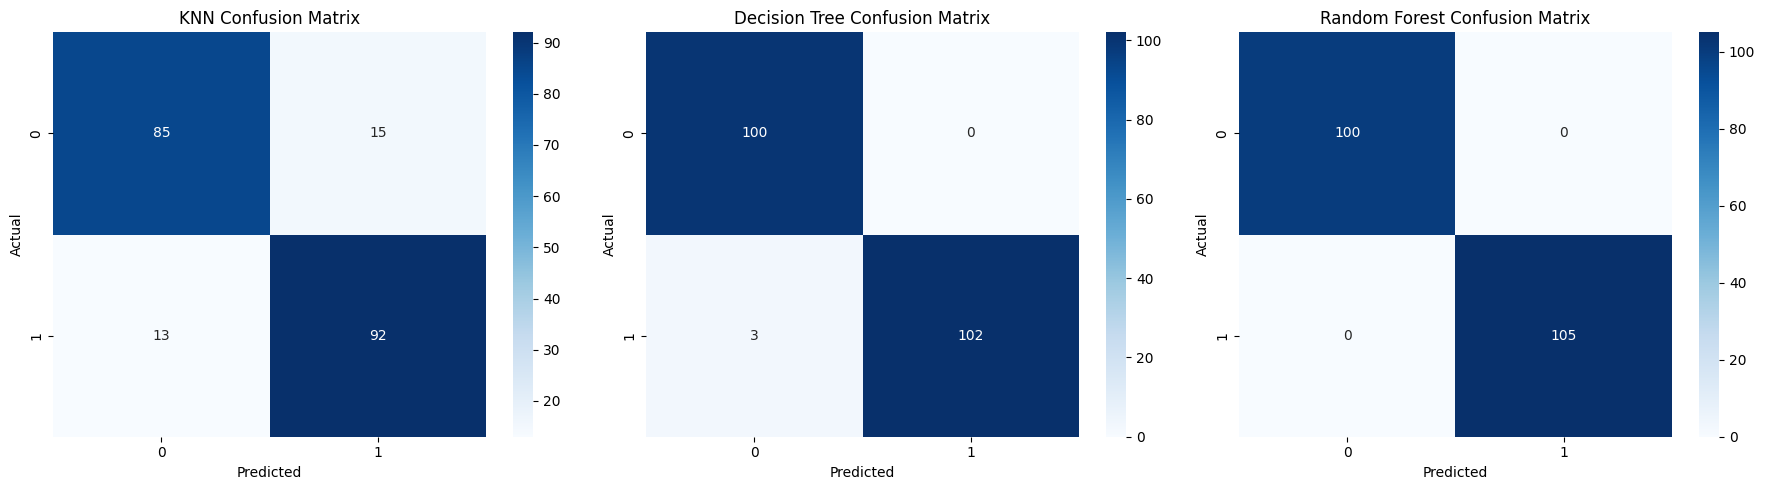

In [15]:
#Confusion Matrices
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for ax, model_name, preds in zip(axes, ['KNN', 'Decision Tree', 'Random Forest'], [knn_pred, dt_pred, rf_pred]):
    sns.heatmap(confusion_matrix(y_test, preds), annot=True, fmt="d", cmap="Blues", ax=ax)
    ax.set_title(f"{model_name} Confusion Matrix")
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")

plt.tight_layout()
plt.show()


In [16]:
#ROC-AUC Scores
knn_roc = roc_auc_score(y_test, knn.predict_proba(X_test_scaled)[:, 1])
dt_roc = roc_auc_score(y_test, dt.predict_proba(X_test)[:, 1])
rf_roc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])

print(f"KNN ROC-AUC: {knn_roc:.4f}")
print(f"Decision Tree ROC-AUC: {dt_roc:.4f}")
print(f"Random Forest ROC-AUC: {rf_roc:.4f}")


KNN ROC-AUC: 0.9689
Decision Tree ROC-AUC: 0.9857
Random Forest ROC-AUC: 1.0000


In [17]:
#Accuracy & ROC-AUC Summary
summary_df = pd.DataFrame({
    'Model': ['KNN', 'Decision Tree', 'Random Forest'],
    'Accuracy': [
        accuracy_score(y_test, knn_pred),
        accuracy_score(y_test, dt_pred),
        accuracy_score(y_test, rf_pred)
    ],
    'ROC-AUC': [knn_roc, dt_roc, rf_roc]
})

summary_df


,Model,Accuracy,ROC-AUC
0,KNN,0.863415,0.968905
1,Decision Tree,0.985366,0.985714
2,Random Forest,1.000000,1.000000


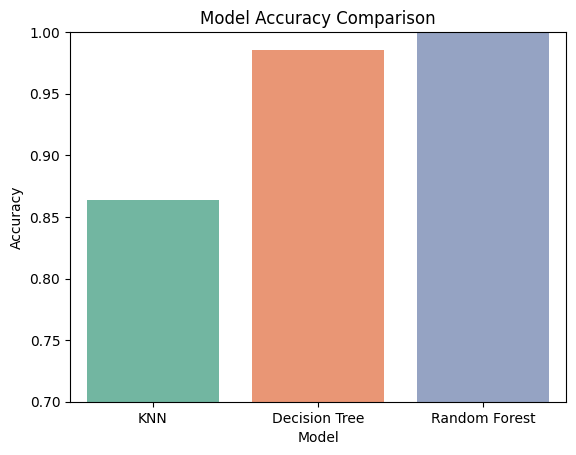

In [18]:
#Accuracy Comparison Plot
sns.barplot(data=summary_df, x='Model', y='Accuracy', palette="Set2")
plt.title("Model Accuracy Comparison")
plt.ylim(0.7, 1.0)
plt.show()
